## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In this jupyter notebook we will be looking at data from the King's County House Sales dataset.  The goal of this project is to make recommendations to a real estate business as to which houses will create a larger profit for them.  In doing so I will be looking at 3 main factors.  The first factor I will explore will be location.  The location of a house for sale could possibly change the price of a house due to things like nice views, good schools, entertainment close by, and other various factors. While the dataset does not include these specifics, if houses on one zip code tend to be higher in price than another we can assume that this zipcode is more desirable.  The second factor I will be looking at will be the size of a house.  A larger house could effect the overall price of the home, and I will also be looking to see if at any point a house is "too big" to see if this effects price aswell.  For the third factor, I will be looking to see if renovations increase the overall price of a house. If any of these 3 factors are more influential to the overall sale price of a house, that will be noted aswell.

1.) Location of house based on zipcode
2.) Size of house
3.) Renovations

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#import csv file Kings County House Sales dataset
kc_house_data = pd.read_csv(r'data\kc_house_data.csv')

In [128]:
#viewing dataset
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


### exploratory analysis for price based on zipcode

viewing values that are empty in the column of price

In [129]:
# Checking for empty values of price
kc_house_data[kc_house_data['price'] == 'NaN']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No values are 'NaN' in the price column

In [130]:
## Checking for empty values of price
kc_house_data[kc_house_data['price'] == '']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No values are empty in the price column

 1.) location.  The plan here is to groupby zipcode.  Then find the average price of each house in each zipcode. Next I will plot each zipcode with its corresponding average price.  This should give me a good insight into which zipcodes have houses that on average sell for more than houses in other zipcodes.

In [131]:
#groupby based on location(zipcode)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
location_group = kc_house_data.groupby('zipcode').mean()

In [132]:
#resetting index so zipcode is first column, not the index.
location_group = location_group.rename_axis('Zipcode').reset_index()

In [185]:
#sorting price by descending
location_group.sort_values(by = 'price', ascending = False)

,Zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
24,98039,3755708209.12,2161300.00,4.06,3.20,3800.90,17403.56,1.56,3290.90,1972.52,448.40,47.63,-122.23,3132.20,17291.10
3,98004,4394237459.35,1356523.99,3.85,2.53,2909.02,13104.22,1.43,2419.84,1971.47,213.76,47.62,-122.21,2674.70,12805.02
25,98040,4199322940.66,1194873.64,4.03,2.72,3106.83,13704.46,1.51,2474.33,1971.47,240.27,47.56,-122.23,2898.74,12801.28
48,98112,4826282176.42,1096239.01,3.51,2.37,2498.74,4990.43,1.81,2005.70,1944.45,185.81,47.63,-122.30,2280.08,4898.16
41,98102,4102040324.29,899607.67,3.25,2.28,2151.05,3605.15,1.99,1752.44,1952.16,103.43,47.63,-122.32,1954.47,3303.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,98148,5579458803.54,284908.60,3.14,1.79,1610.53,8960.72,1.21,1486.49,1963.26,41.96,47.44,-122.33,1611.23,8812.39
0,98001,4651273623.07,281194.87,3.39,2.01,1903.78,14967.00,1.43,1723.76,1980.87,28.04,47.31,-122.27,1830.10,11218.88
20,98032,4548920835.15,251296.24,3.39,1.71,1738.05,10379.76,1.22,1434.32,1965.46,36.68,47.37,-122.28,1668.63,9271.93
64,98168,3204784607.10,240328.37,3.00,1.43,1468.62,11269.84,1.16,1234.09,1952.72,53.48,47.49,-122.31,1471.68,9744.02


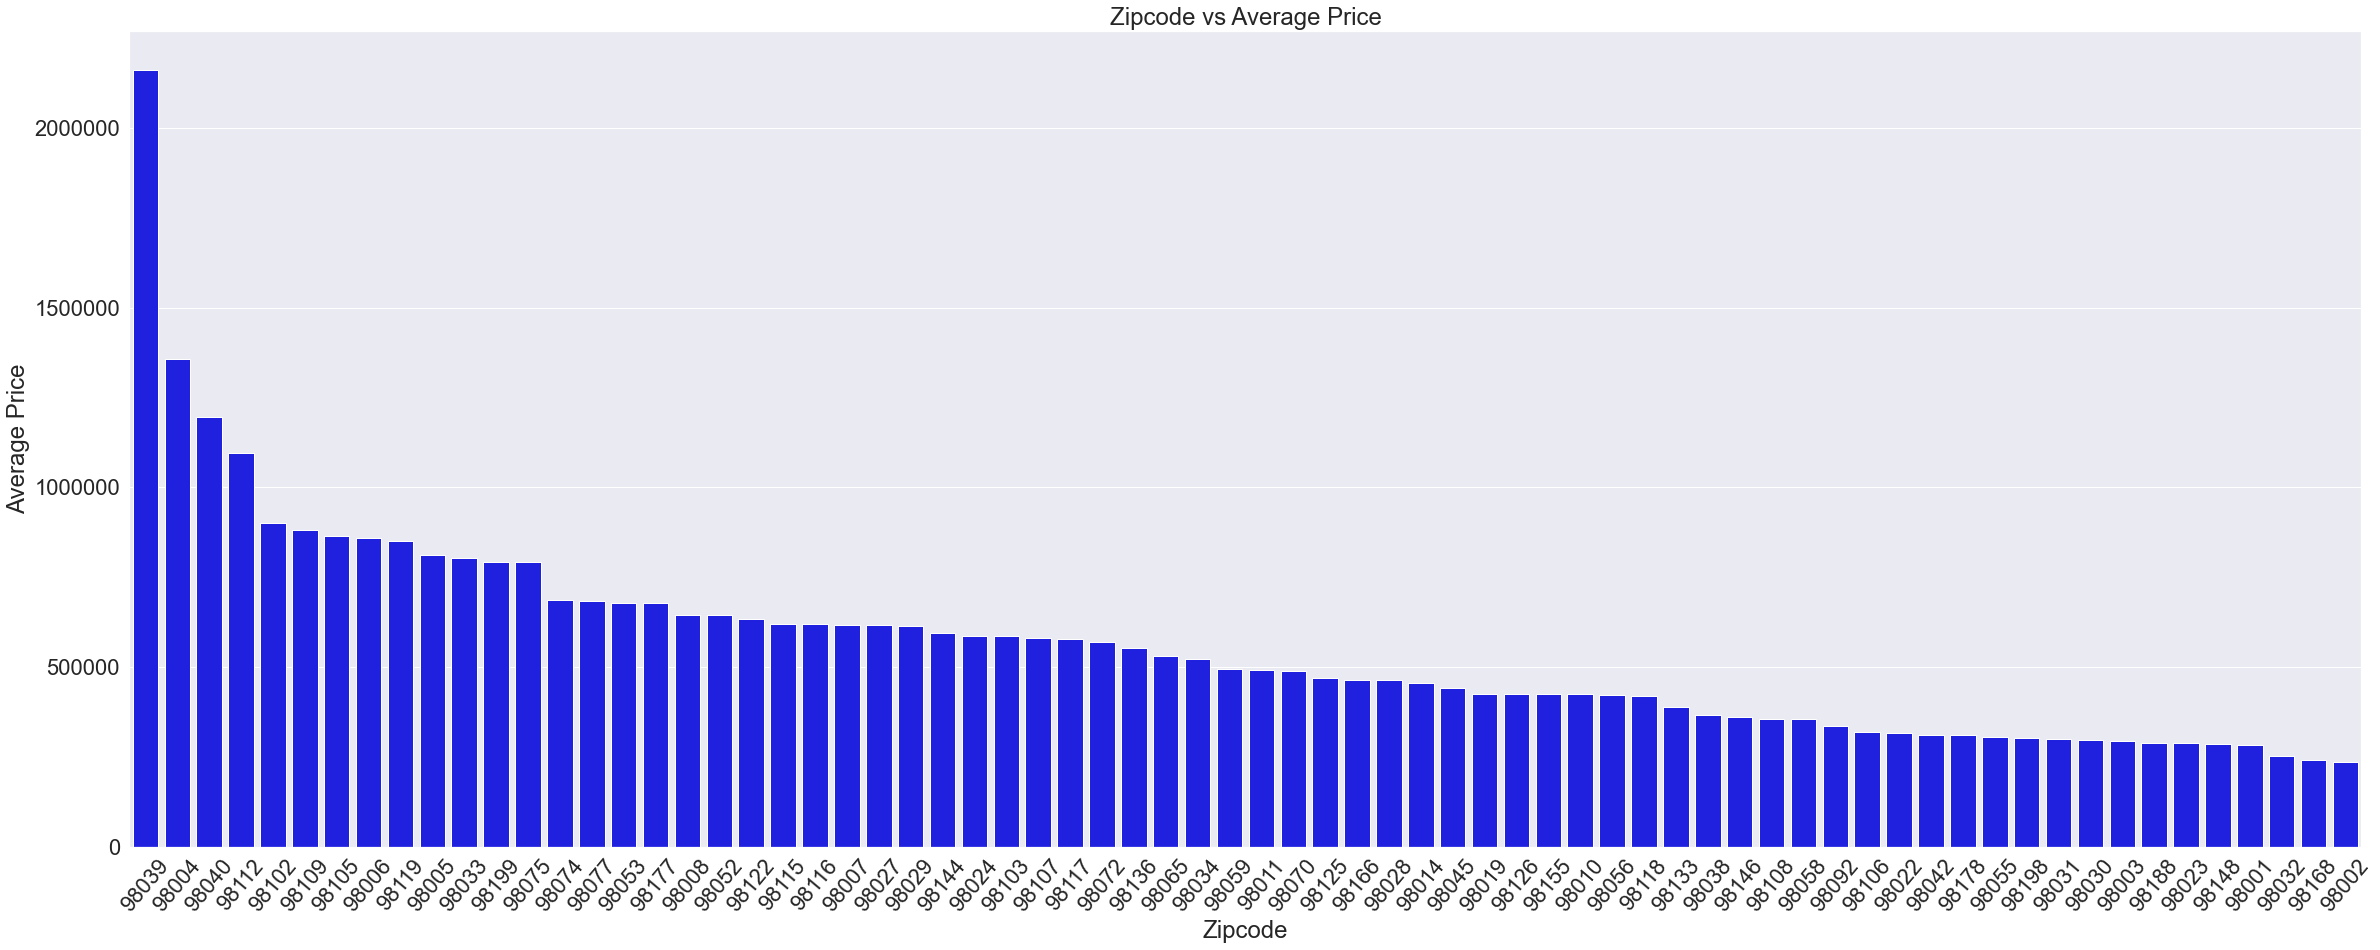

In [210]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale = 2)
sns.barplot(x = 'Zipcode',
            y = 'price',
            data = location_group,
            color = 'blue',
            order = location_group.sort_values('price', ascending = False).Zipcode)

plt.title('Zipcode vs Average Price')
plt.xlabel('Zipcode')
plt.xticks(rotation=50)
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')

